### Support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns,used for classification and regression analysis.
### An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = pd.read_csv("../input/iris/Iris.csv")
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


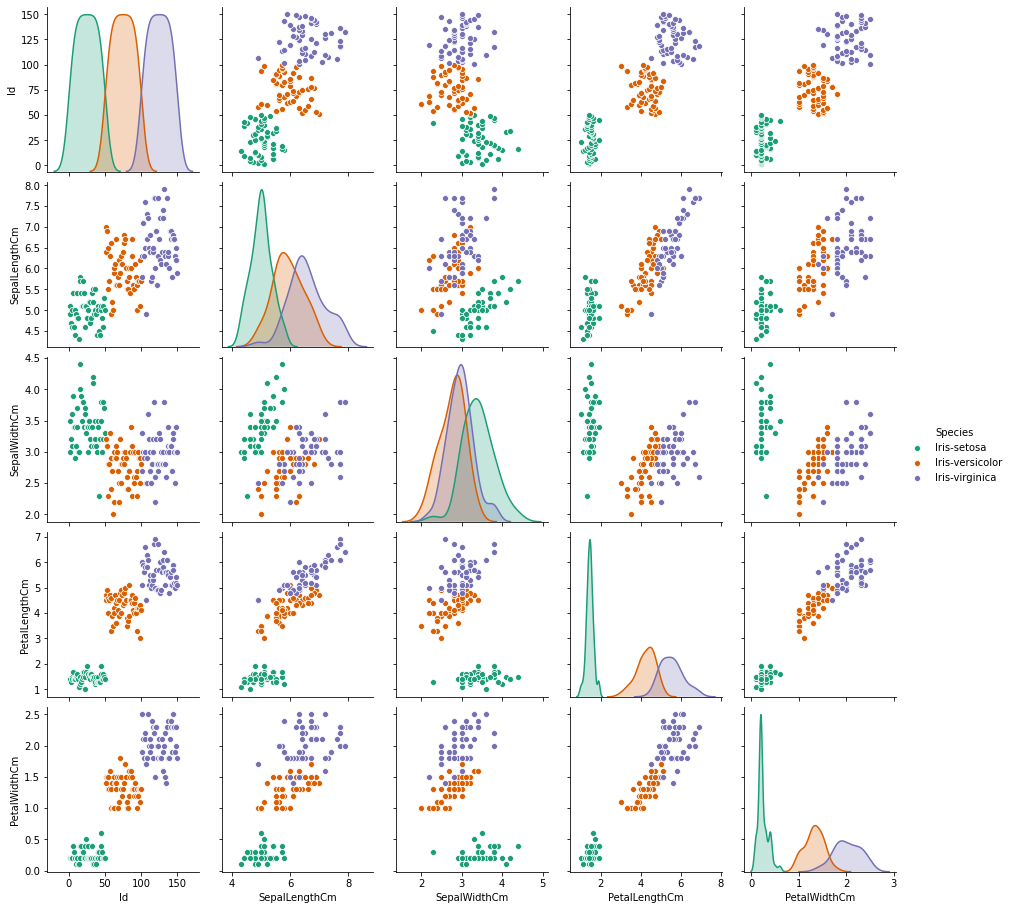

In [2]:
sns.pairplot(d, hue='Species', palette='Dark2')

In [3]:
#iris setosa is easily separable from the other 2 using any ML Algo

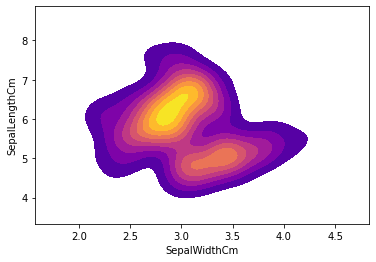

In [4]:
setosa=d[d['Species']=='setosa'] 
sns.kdeplot(d['SepalWidthCm'], d['SepalLengthCm'], cmap='plasma', shade=True,shade_lowest=False)

In [5]:
from sklearn.model_selection import train_test_split
x = d.drop('Species', axis=1)
y = d['Species']
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.3, random_state=101)
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [6]:
pr = svc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.97      0.99        37
Iris-versicolor       0.81      1.00      0.90        30
 Iris-virginica       1.00      0.84      0.91        38

       accuracy                           0.93       105
      macro avg       0.94      0.94      0.93       105
   weighted avg       0.95      0.93      0.93       105



In [7]:
print(confusion_matrix(y_test,pr))

[[36  1  0]
 [ 0 30  0]
 [ 0  6 32]]


### Hyperparameters are those that cannot be directly learned. They are commonly chosen by human based on some intuition or hit and trial before the actual training begins. These parameters exhibits their importance by improving performance of the model such as its complexity or its learning rate. 

### we need the hyperparameters of our model adjusted for which we will do a grid search to find out the best possible values for c and gamma
### A large c value gives you low bias and high variance because you penalise the cost of misclassification or vice versa for low c, whereas a large gamma value leads to high bias and low variance or vice versa

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [11]:
grid.best_params_  #grab the best parameters from the grid search

{'C': 1, 'gamma': 0.001}

In [12]:
gpr = grid.predict(x_test)
print(classification_report(y_test,gpr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.88      1.00      0.94        30
 Iris-virginica       1.00      0.89      0.94        38

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.97      0.96      0.96       105



In [13]:
print(confusion_matrix(y_test,gpr))

[[37  0  0]
 [ 0 30  0]
 [ 0  4 34]]


### this model performs very well with a limited amount of data to analyze.